# Modelling of a pure moment
## How to model a pure moment using consistent nodal loads
## Outcomes:
## 1. Understand how to model a pure moment on a structure
## 2. Reminder moment is the integral of a stress distribution across the surface - force and moment resultants

<img src="stress_resultants.png" style="width: 600px;"/>

## Hence, our applied moment problem is actually a stress distribution that we know how it should look
## Given the moment, and the second moment of area, we know that the stress varies linearly ($y$) over the height of the beam.

<img src="ModeLling_Moment_Cropped.png" style="width: 600px;"/>

## What we need to find out is what is the consistent nodal loads that we need to apply to model this?
## Recall that a body force load in 1D is similar to a load distributed over the edge of a 2D element.
## All we need to do is write the stress distribution over the edge of the element as a function of the local variable varying over that edge.
## Given the moment is 1 Nm, what is the consistent nodal loading?
## What do I expect to see, what stresses should be zero and which onces should be non-zero?

<img src="SV_problem.png" style="width: 380px;"/>
<img src="SV_mesh_with_numbers.png" style="width: 380px;"/>

# Model 1
## Inconsistent modelling of a moment

<img src="SV_Q8_2x4_mesh_oneforce.png" style="width: 380px;"/>

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0000 seconds.
Done assembling K and F    :   0.0150 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0050 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


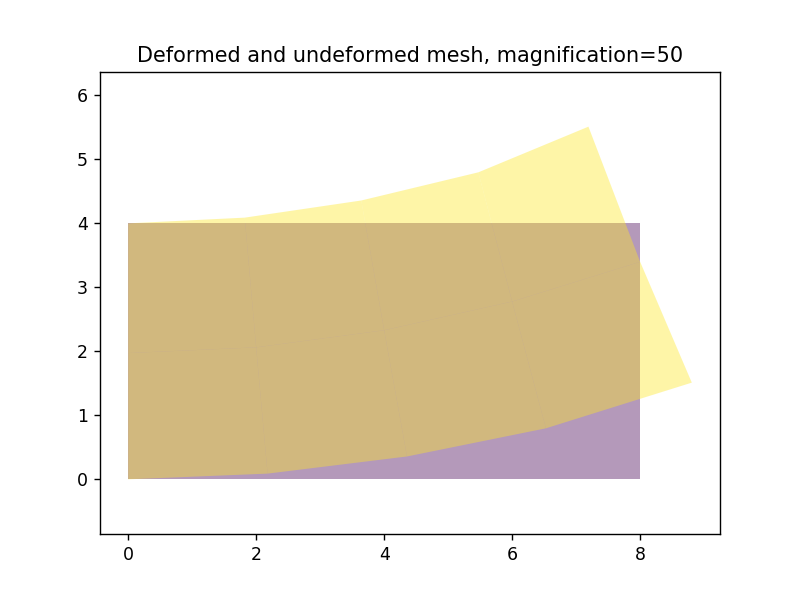

<IPython.core.display.Javascript object>


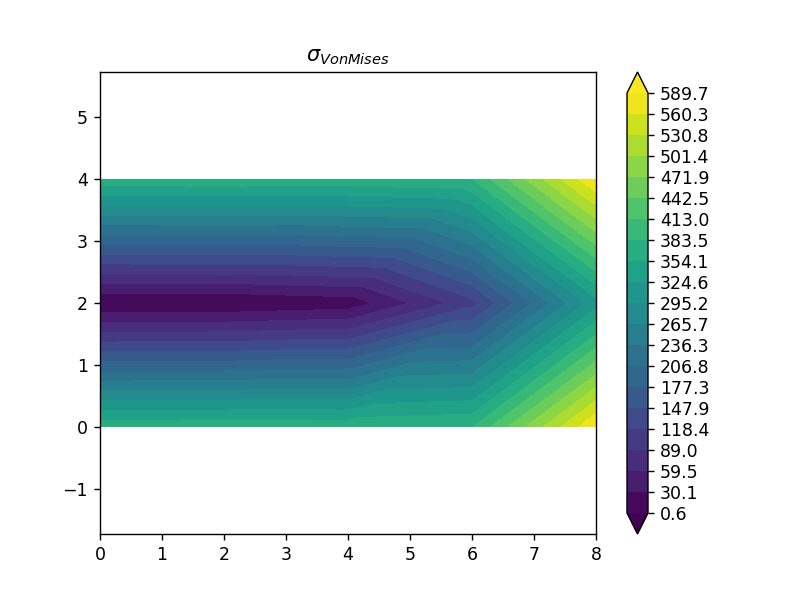

<IPython.core.display.Javascript object>


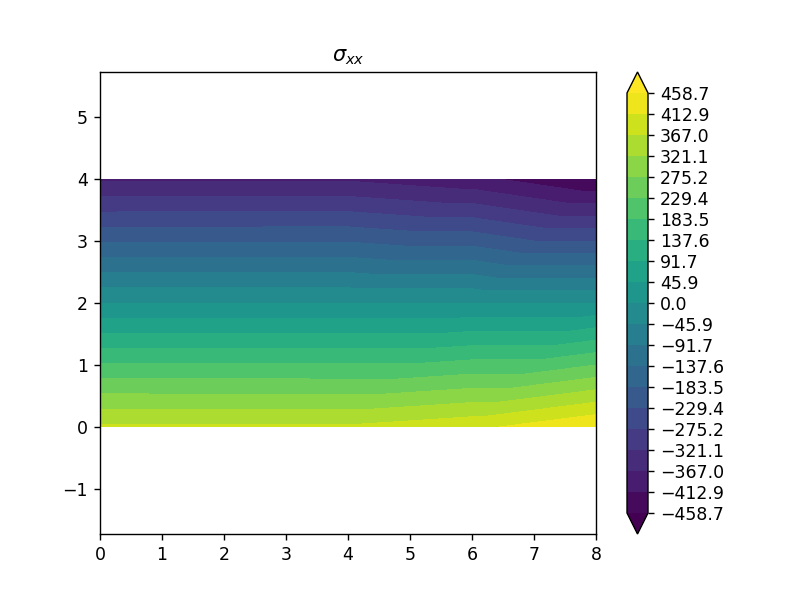

<IPython.core.display.Javascript object>


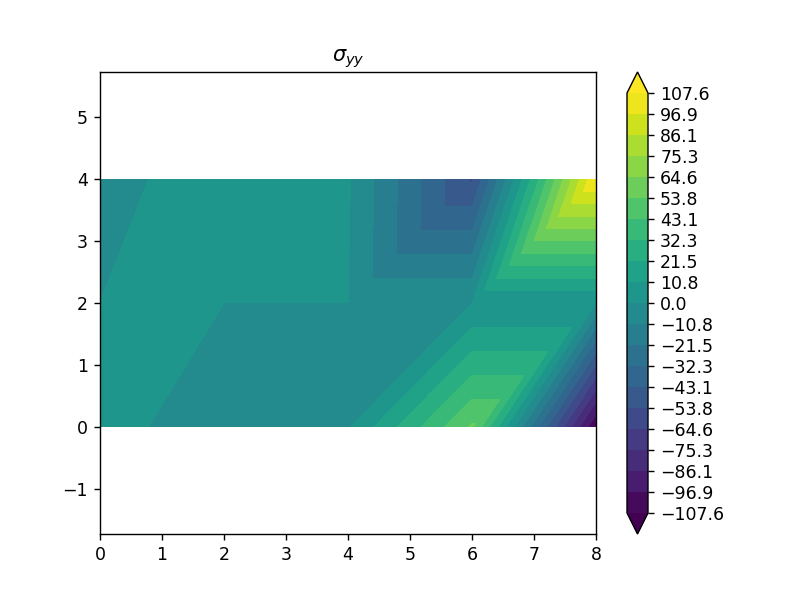

<IPython.core.display.Javascript object>


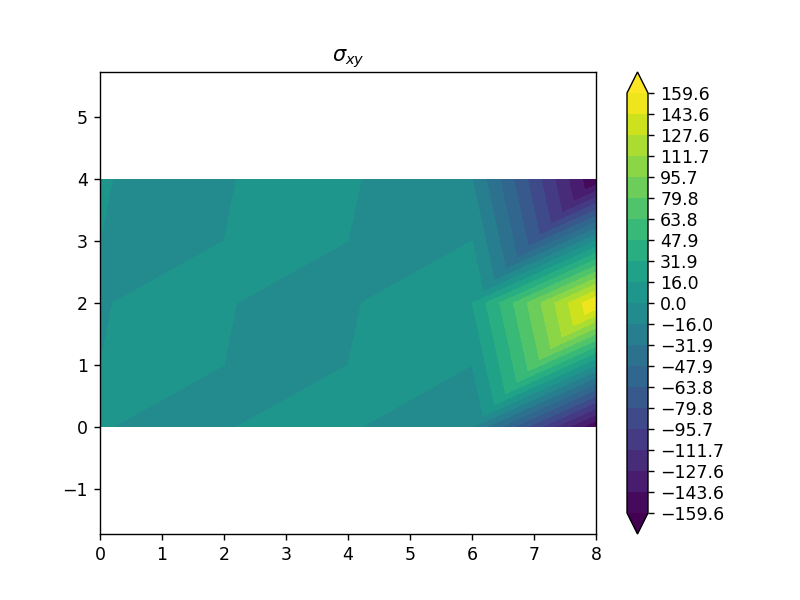

Individual Applied Reaction Forces 
 [[-1.24985147e+02]
 [ 2.95585778e-12]
 [-2.50029707e+02]
 [-2.13162821e-14]
 [ 2.50029707e+02]
 [ 1.24985147e+02]]
You can Confirm this distribution is the same as the consistent nodal load split - see next question

 Sum Reaction forces along x 4.149569576838985e-12


In [14]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_2x4_pull1',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))
print('You can Confirm this distribution is the same as the consistent nodal load split - see next question')

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

## Confirm that the applied and reaction forces of the Linear Algebra System is in force and moment equilibrium

In [18]:
sxx = 1 * 2/1000 / (1/12*1/1000*(4/1000)**3); print(sxx)
print(SXXIC)
ReactionForcesIC

375000000.0
[[ 3.75099390e+02  3.74780782e+02  4.33489701e-01 -1.93833367e-01]
 [ 3.75059894e+02  3.76186251e+02 -2.36727222e+00 -1.25018131e-01]
 [ 3.71001652e+02  3.65781963e+02  1.85482778e+01  7.88449042e+00]
 [ 4.34188208e+02  4.58749362e+02 -1.69257722e+02 -1.16617417e+02]
 [ 1.93833367e-01 -4.33489701e-01 -3.74780782e+02 -3.75099390e+02]
 [ 1.25018131e-01  2.36727222e+00 -3.76186251e+02 -3.75059894e+02]
 [-7.88449042e+00 -1.85482778e+01 -3.65781963e+02 -3.71001652e+02]
 [ 1.16617417e+02  1.69257722e+02 -4.58749362e+02 -4.34188208e+02]]


matrix([[-1.24985147e+02],
        [ 2.95585778e-12],
        [-2.50029707e+02],
        [-2.13162821e-14],
        [ 2.50029707e+02],
        [ 1.24985147e+02]])

# Computing consistent nodal loads for 2D element, linearly varying load over an edge
## P305: Q8 N matrix
# Substitute $\xi=1$ as that is the right-side of the element.
# Compare the result with the 1D - bar element shape functions

In [12]:
import sympy as sp
xi,eta =  sp.symbols('xi,eta')

N1 = -(1-xi)*(1-eta)*(1+xi+eta)/4
N2 = -(1+xi)*(1-eta)*(1-xi+eta)/4
N3 = -(1+xi)*(1+eta)*(1-xi-eta)/4
N4 = -(1-xi)*(1+eta)*(1+xi-eta)/4
N5 = (1-xi**2)*(1-eta)/2
N6 = (1+xi)*(1-eta**2)/2
N7 = (1-xi**2)*(1 + eta)/2
N8 = (1-xi)*(1 - eta**2)/2

N = sp.Matrix([[N1,0,N2,0,N3,0,N4,0,N5,0,N6,0,N7,0,N8,0],
               [0,N1,0,N2,0,N3,0,N4,0,N5,0,N6,0,N7,0,N8]])

N.subs({xi:1})

Matrix([
[0, 0, -eta*(1 - eta)/2,                0, eta*(eta + 1)/2,               0, 0, 0, 0, 0, 1 - eta**2,          0, 0, 0, 0, 0],
[0, 0,                0, -eta*(1 - eta)/2,               0, eta*(eta + 1)/2, 0, 0, 0, 0,          0, 1 - eta**2, 0, 0, 0, 0]])

# Lets compute the consisten nodal loads for the shape functions on the right-hand edge.

In [9]:
M = 1
t = 1/1000
h = 4/1000
I = 1/12*t*h**3
ymax = h/2
L = h/2

Smax = M*ymax/I

import sympy as sp
eta = sp.symbols('eta')

S = Smax/2*(1+eta)

N1 = -1/2*eta*(1-eta)
N2 = 1/2*eta*(1+eta)
N3 = (1+eta)*(1-eta)

N = sp.Matrix([N1,N2,N3])

integrand = S*N*t*L/2

nodal_loads = sp.integrate(integrand,(eta,-1,1))

print(nodal_loads)

Matrix([[0], [125.000000000000], [250.000000000000]])


## Consistent nodal load modelling

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0000 seconds.
Done assembling K and F    :   0.0159 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0040 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


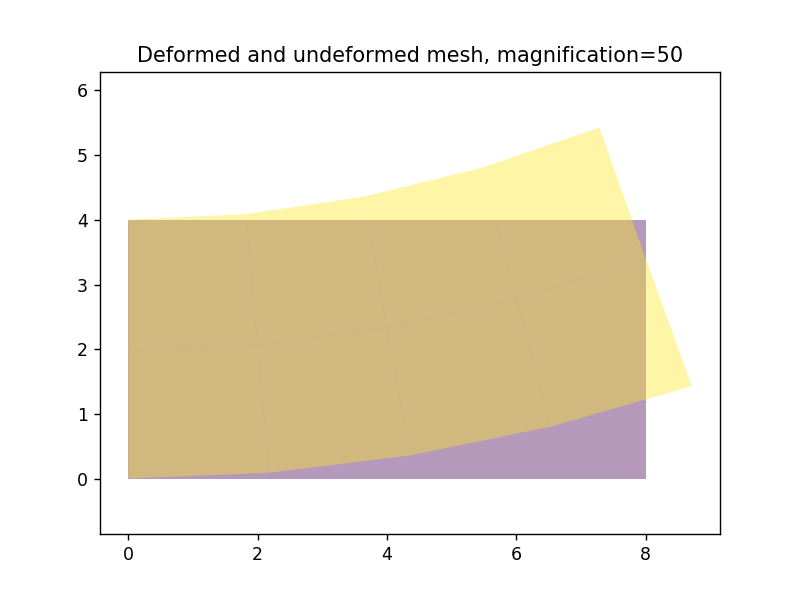

<IPython.core.display.Javascript object>


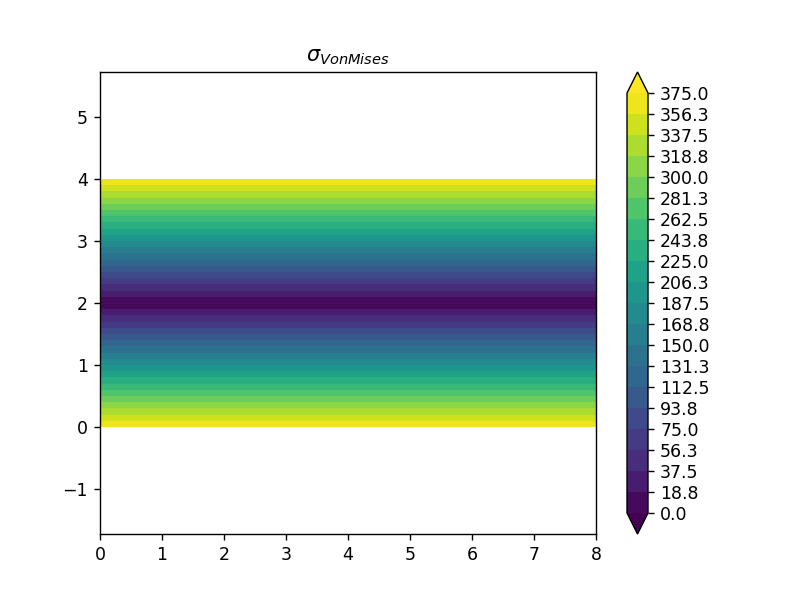

<IPython.core.display.Javascript object>


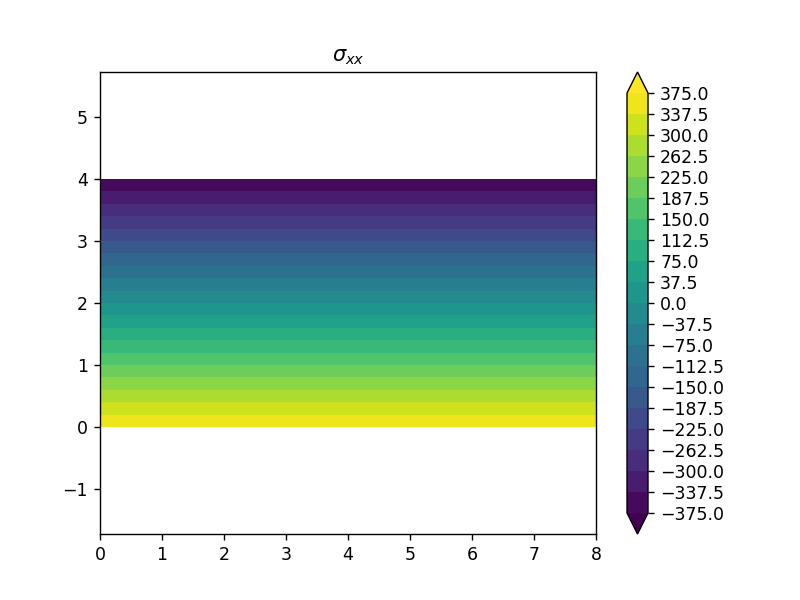

<IPython.core.display.Javascript object>


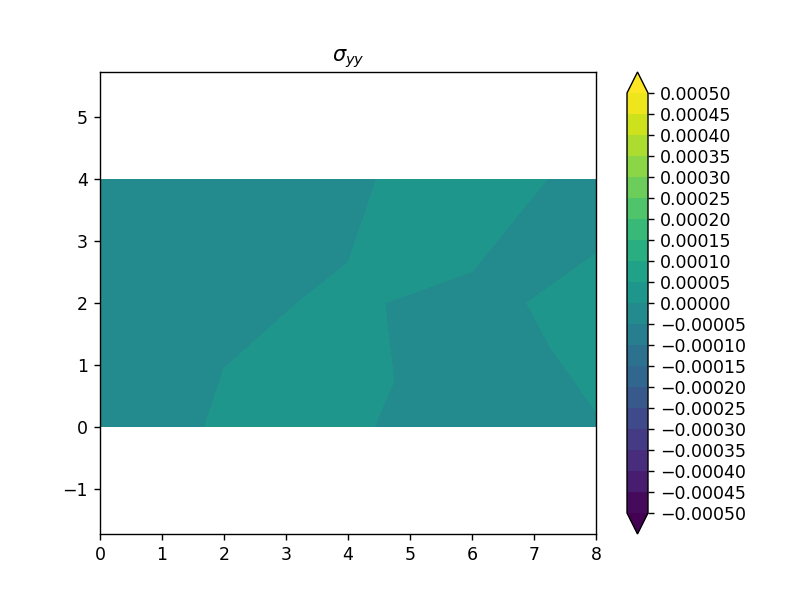

<IPython.core.display.Javascript object>


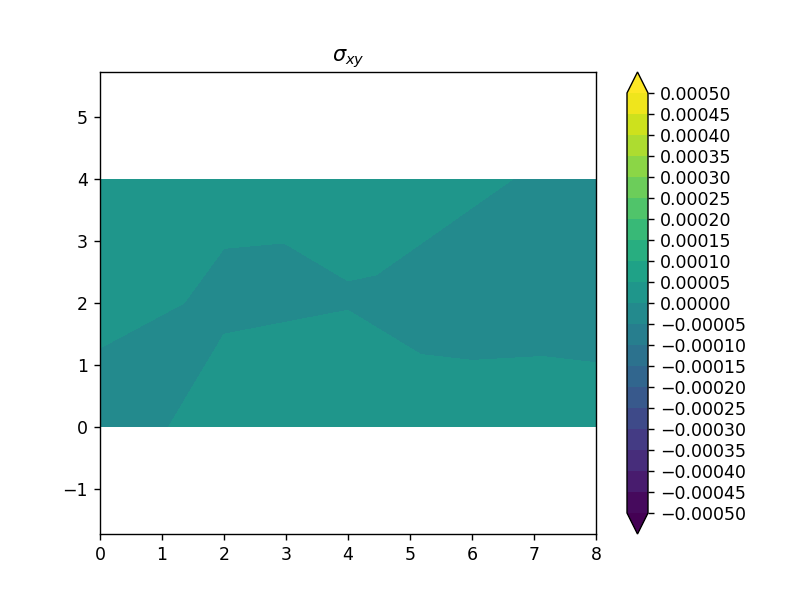

Individual Applied Reaction Forces 
 [[-1.25000000e+02]
 [ 2.65742983e-12]
 [-2.50000000e+02]
 [-2.13162821e-14]
 [ 2.50000000e+02]
 [ 1.25000000e+02]]
You can Confirm this distribution is the same as the consistent nodal load split - see next question

 Sum Reaction forces along x 4.149569576838985e-12


In [22]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

UC, ReactionForcesC, VonMisesC, SXXC, SYYC, SXYC = launch_fem('Q8_2x4_pull2',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesC))
print('You can Confirm this distribution is the same as the consistent nodal load split - see next question')

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesC)))


## Confirm that the applied and reaction forces of the Linear Algebra System is in force and moment equilibrium

# Compare solutions between inconsistent modelling of moment and consistent nodal loads, what are the similarities and what are differences. Compare reaction forces, stresses and displacements